In [49]:
####################################################################
#               Lstm based story Writer                            #
####################################################################
# Generates some texts till 15 words                               #
# just give a seed sentence consisting 10 words in seed Variable   #
####################################################################

In [50]:
######################################################################
#                      Approach                                      #
######################################################################
# The text is first converted to a sequence then LSTM is used        #
# To find the next word in the sequence                              #
######################################################################

#######################################################################
# Changelog : Added attention layers  for our model                   #
######################################################################

In [51]:
!pip install wordcloud

In [52]:
!pip install --upgrade tensorflow


In [53]:
!pip install --upgrade tensorflow

In [54]:
!pip install --upgrade keras

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/BattleCreekDec19_2019.txt
../data/BemidjiSep18_2020.txt
../data/CharlestonFeb28_2020.txt
../data/CharlotteMar2_2020.txt
../data/CincinnatiAug1_2019.txt
../data/ColoradorSpringsFeb20_2020.txt
../data/DallasOct17_2019.txt
../data/DesMoinesJan30_2020.txt
../data/FayettevilleSep19_2020.txt
../data/FayettevilleSep9_2019.txt
../data/FreelandSep10_2020.txt
../data/GreenvilleJul17_2019.txt
../data/HendersonSep13_2020.txt
../data/HersheyDec10_2019.txt
../data/LasVegasFeb21_2020.txt
../data/LatrobeSep3_2020.txt
../data/LexingtonNov4_2019.txt
../data/MilwaukeeJan14_2020.txt
../data/MindenSep12_2020.txt
../data/MinneapolisOct10_2019.txt
../data/MosineeSep17_2020.txt
../data/NewHampshireAug15_2019.txt
../data/NewHampshireAug28_2020.txt
../data/NewHampshireFeb10_2020.txt
../data/NewMexicoSep16_2019.txt
../data/OhioSep21_2020.txt
../data/PhoenixFeb19_2020.txt
../data/PittsburghSep22_2020.txt
../data/TexasSep23_2019.txt
../data/ToledoJan9_2020.txt
../data/TulsaJun20_2020.txt
../data/TupeloNov1

In [56]:
## making imports
import matplotlib.pyplot as plt
import sklearn 
import tensorflow as tf
import keras

In [57]:

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.2


In [58]:
CorPus = ""
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        file = open(dirname+'/'+filename, "r")
        CorPus = CorPus + file.read() 
        file.close()

#print (CorPus)




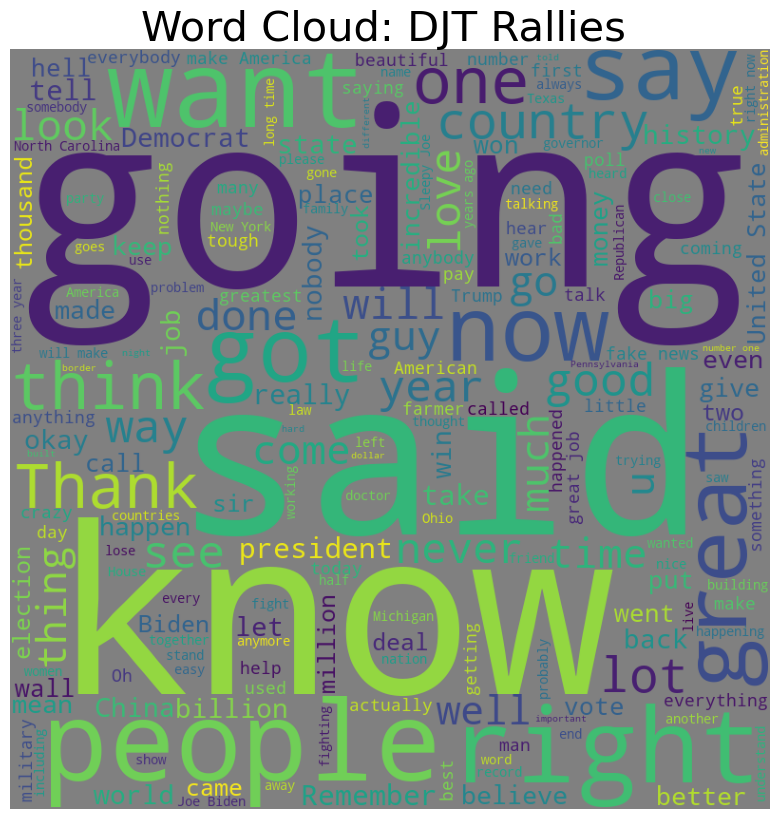

In [59]:
## Plotting wordCloud for this CorPus
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', stopwords = stopwords,  min_font_size = 10).generate(CorPus)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.rcParams.update({'font.size': 25})
plt.axis("off") 
plt.title('Word Cloud: DJT Rallies ')
plt.tight_layout(pad = 0) 
  
plt.show() 

In [60]:
## Converting Corpus to list
CorPusList = list(CorPus.lower().split())
print (CorPusList[0: 50])

['thank', 'you.', 'thank', 'you.', 'thank', 'you', 'to', 'vice', 'president', 'pence.', "he's", 'a', 'good', 'guy.', "we've", 'done', 'a', 'great', 'job', 'together.', 'and', 'merry', 'christmas,', 'michigan.', 'thank', 'you,', 'michigan.', 'what', 'a', 'victory', 'we', 'had', 'in', 'michigan.', 'what', 'a', 'victory', 'was', 'that.', 'one', 'of', 'the', 'greats.', 'was', 'that', 'the', 'greatest', 'evening?', 'but', "i'm"]


In [61]:
## removing Punctuations
import re
noPunctuation = []

for idx in range(len(CorPusList)):
    noPunctuation.append(re.sub("\?|\.|\|\,|\'|\"|\,", '', CorPusList[idx]))

In [62]:
CorPusList = noPunctuation

In [63]:
## Lets convert our Corpus to a Sequence
UniqueWords = set(CorPusList)
MapOfCorPus = {}
InverseMapOfCorpus = {}
i = 0

for mem in UniqueWords:
    MapOfCorPus[mem] = i 
    InverseMapOfCorpus[i] = mem
    i = i + 1

#print ('Corpus map:\n{}'.format(MapOfCorPus))


In [64]:
## Now Using this Map Converting our Corpus to a Sequence
SequenceOfCoprpus = []
for mem in CorPusList:
    SequenceOfCoprpus.append(MapOfCorPus[mem])

#print('Corpus Seuence:\n{}'.format(SequenceOfCoprpus))

In [65]:
## going for classification approach
T = 10
Y = []

for t in range(len(SequenceOfCoprpus) - T):
  y = SequenceOfCoprpus[t+T]
  Y.append(y)

YY = np.array(Y)

In [66]:
##XX = np.array(SequenceOfCoprpus)
##Xnorm = (XX- XX.mean())/ XX.std()
#print(Xnorm)
#SequenceOfCoprpus = Xnorm

In [67]:
## Now since we have  transformed our Corpus to a seuence we might use to train a Rnn 
## using Past 10 values for each prediction
T = 10
D = 1
X = []
Y = []

for t in range(len(SequenceOfCoprpus) - T):
  x = SequenceOfCoprpus[t:t+T]
  X.append(x)
  y = SequenceOfCoprpus[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T, 1) 
Y = np.array(Y)
N = len(X)


In [68]:
#####################################################################################
# Attention layer Implementation                                                    #
#####################################################################################
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)
 
    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [69]:
MyModel = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(len(MapOfCorPus), 20),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(70, return_sequences = True)),
    tf.keras.layers.LSTM(140, return_sequences = True),
    attention(),
    #tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(len(MapOfCorPus), activation = 'softmax')
])

In [70]:
MyModel.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam()
                , metrics=['accuracy'])

In [71]:
X
YY

array([7504, 2525, 2475, ..., 8233, 7143, 8564])

90 minutes to fit the model

In [72]:
# trained to 300 iterations
from tensorflow import squeeze
retVal = MyModel.fit(
  X, YY,
  epochs=100,
  batch_size= 650,
  verbose = True
)

Epoch 1/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.0377 - loss: 6.8854
Epoch 2/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 50s 88ms/step - accuracy: 0.0503 - loss: 6.1583
Epoch 3/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 48s 84ms/step - accuracy: 0.0634 - loss: 5.9949
Epoch 4/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 47s 83ms/step - accuracy: 0.0768 - loss: 5.7841
Epoch 5/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.0941 - loss: 5.5907
Epoch 6/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 49s 86ms/step - accuracy: 0.1105 - loss: 5.4215
Epoch 7/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 53s 93ms/step - accuracy: 0.1217 - loss: 5.2734
Epoch 8/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.1347 - loss: 5.1353
Epoch 9/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 50s 88ms/step - accuracy: 0.1450 - loss: 5.0191
Epoch 10/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 52s 91ms/step - accuracy: 0.1539 - loss: 4.9206
Epoch 11/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 51s 89ms/step - accuracy: 0.1631 - loss: 4.8267
Epoch 12/100
570/57

In [73]:
Seed = "thank you very much thank you i will never ever"
def transformer(Seed):
    SeedList = list(Seed.split())
    retList = []
    
    for mem in SeedList:
        retList.append((MapOfCorPus[mem]))
    return retList


    

In [74]:
## lets make some predictions 
## better make this a function
def TheFunc(Seed):
    
    print ('You said : ' + Seed)
    print ('\n')
    predictions = []
    PredVect = np.array(transformer(Seed))
    #PredVect = std.transform(PredVect.reshape(-1,1))


    while len(predictions) < 40:
        word = MyModel.predict(PredVect.reshape(1, T, 1))[0]
        the_word = InverseMapOfCorpus[np.argmax(word)]
        #print(np.argmax(word))
    
        predictions.append(the_word)
    
        PredVect = np.roll(PredVect, -1)
        PredVect[-1] = np.argmax(word)
    
    return predictions

In [75]:
def printPrediction(arr):
    print ('Trump says: ', end = '')
    for mem in arr:
        print(mem, end = " ")

In [76]:
### Lets play a round of what would trump say 
printPrediction(TheFunc(Seed))

You said : thank you very much thank you i will never ever


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [77]:
printPrediction(TheFunc('hi how are you its a very very good day'))

You said : hi how are you its a very very good day


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

In [78]:
printPrediction(TheFunc('how us relations change with world if you become president'))

You said : how us relations change with world if you become president


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━

In [79]:
printPrediction(TheFunc('what foreign policy you will choose when you became president'))

You said : what foreign policy you will choose when you became president


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━

In [80]:
printPrediction(TheFunc('when did you have last negative test for the disease'))

You said : when did you have last negative test for the disease


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [81]:
printPrediction(TheFunc('donald what do you think about social media and television'))

You said : donald what do you think about social media and television


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━

In [82]:
printPrediction(TheFunc('donald what do you think about the current pandemic situation'))

You said : donald what do you think about the current pandemic situation


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

In [85]:
# MyModel.save('NLP.h5')
MyModel.save('my_model.keras')

try: 
    geeky_file = open('MapofCorpus.txt', 'wt') 
    geeky_file.write(str(MapOfCorPus)) 
    geeky_file.close() 
  
except: 
    print("Unable to write to file")
 

try: 
    geeky_file = open('InverseMapofCorpus.txt', 'wt') 
    geeky_file.write(str(InverseMapOfCorpus)) 
    geeky_file.close() 
  
except: 
    print("Unable to write to file")

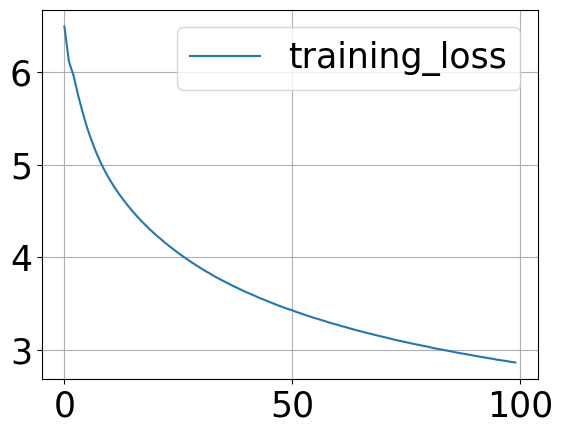

In [84]:
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.legend()
plt.grid(True)